# Exploring NYC 311 data

## Prediction of resolution time for a particular problem in a particular Borough.
## Forecast of volume of calls that will come in a day

#### Working on dataset for year 2015

In [62]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/ayush007/Documents/FDS/NYC 311/311_Service_Requests_from_2015.csv', header=0,
    sep=',', parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')

### Calculating Resolution Time in terms of days



In [3]:
def prepareData(df):
    df['Resolution_Time'] = (df['Closed Date'] - df['Created Date']).dt.days
    df_clean=df[df['Resolution_Time'].notnull()]
    df_perfect = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
    df_perfect['Day of Week'] = df_perfect['Created Date'].dt.dayofweek
    df_perfect['Day of Month'] = df_perfect['Created Date'].dt.day
    df_perfect['Month'] = df_perfect['Created Date'].dt.month
    df_perfect['Year'] = df_perfect['Created Date'].dt.year
    df_perfect=df_perfect[df_perfect.Borough!='Unspecified']
    return df_perfect

In [4]:
df_perfect = prepareData(df)
df_perfect.shape

(2099575, 57)

#### Let's see what were the most frequent and least frequent complaints in NYC in 2015

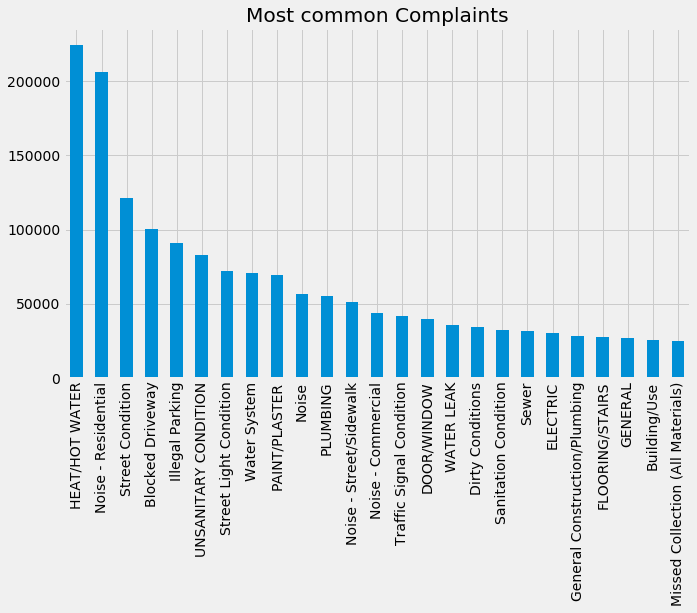

In [5]:
(df_perfect['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most common Complaints')

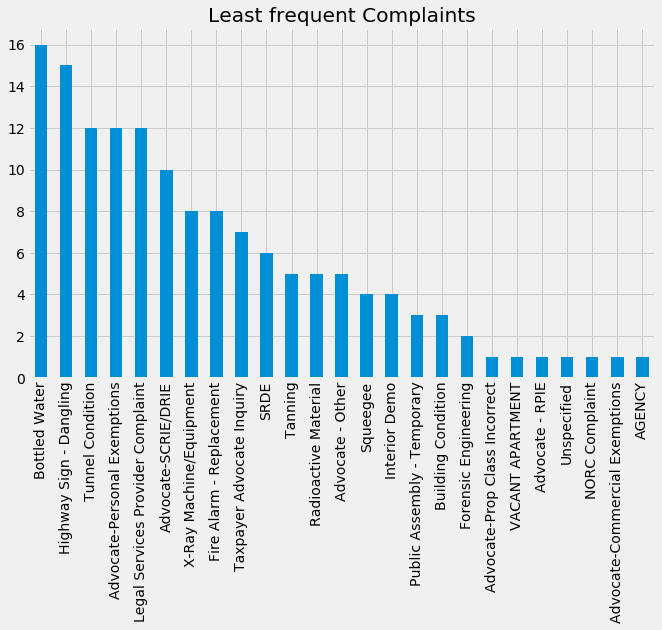

In [6]:
(df_perfect['Complaint Type'].value_counts()).tail(25).plot(kind='bar',
                    figsize=(10,6), title = 'Least frequent Complaints')

### Complaint distribution across Boroughs

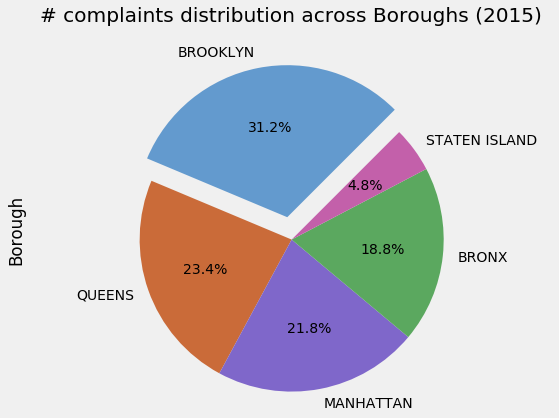

In [7]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_perfect['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('# complaints distribution across Boroughs (2015)\n')
plt.tight_layout()
plt.show()

(-74.252209273941219,
 -73.700771566384404,
 40.503329093002719,
 40.906862062031507)

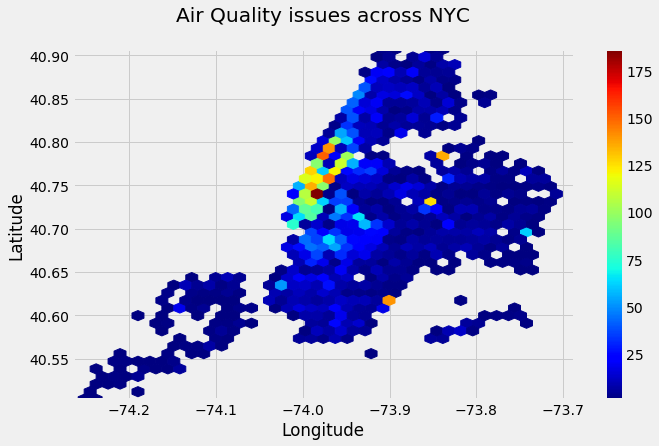

In [8]:
df_perfect_Air = df_perfect[df_perfect['Complaint Type'] == 'Air Quality']
df_perfect_Air.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Air Quality issues across NYC\n', figsize=(10,6)).axis('equal')

As expected, we can see that most number of air quality issues comes from Lower Manhattan.

### Let's see how does Brooklyn look like

In [9]:
df_Brooklyn = df_perfect[df_perfect['Borough']=='BROOKLYN']

In [10]:
df_Brooklyn.shape

(654694, 57)

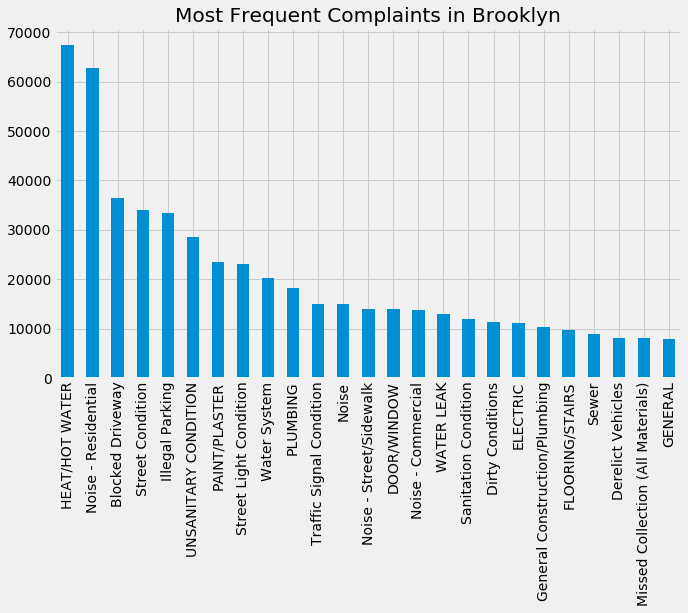

In [11]:
(df_Brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

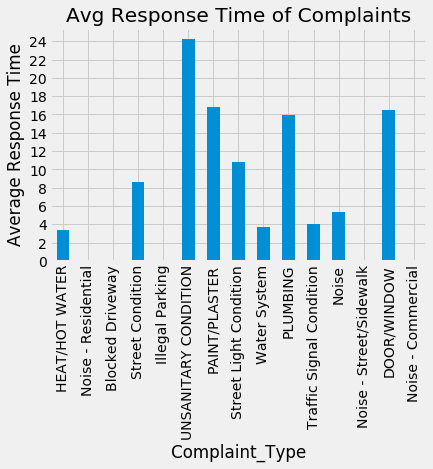

In [12]:
import matplotlib.ticker as ticker

var = df_Brooklyn.groupby('Complaint Type').Resolution_Time.mean()
frequent = df_Brooklyn['Complaint Type'].value_counts().head(25)
var = var.ix[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Complaints")
tick_spacing = 2
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var.head(15).plot(kind='bar')

We can see here that, generally Noise and illegal parking issues are resolved on the same day. While issues like Unsanitary condition take a rather long time to resolve.

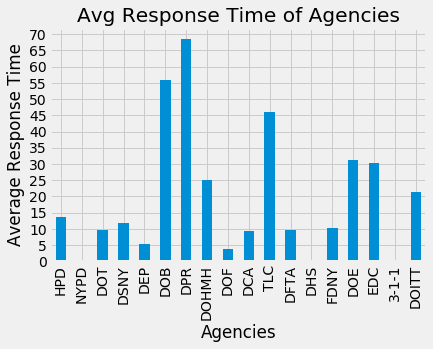

In [13]:
import matplotlib.ticker as ticker

var = df_Brooklyn.groupby('Agency').Resolution_Time.mean()
frequent = df_Brooklyn['Agency'].value_counts().head(25)
var1 = var.ix[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Agencies')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Agencies")
tick_spacing = 5
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var1.head(25).plot(kind='bar')

From the above graph we can conclude that NYPD, DHS And 3-1-1 are the most efficient agencies among the rest. These are also the agencies which generally solve the most number of complaints.

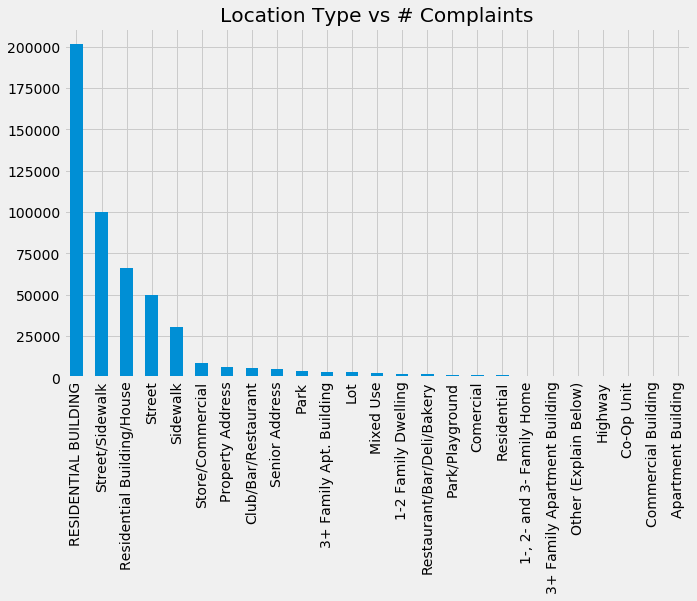

In [14]:
(df_Brooklyn['Location Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Location Type vs # Complaints')

This graph is telling us that most number of complaints in 2015 came from residential locations. We can relate that most common complaint type is Heat/Hot Water and these must be coming from resedential buildings during the winters.

(-74.056070710674547,
 -73.840023278532783,
 40.555768040404651,
 40.753034410640936)

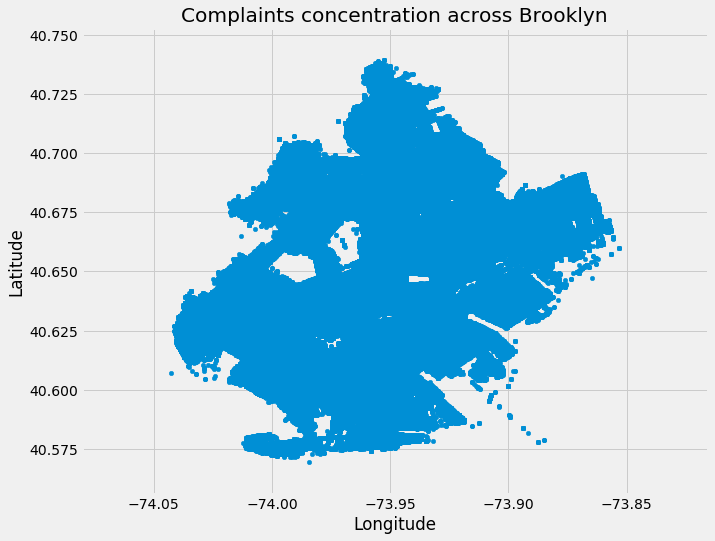

In [15]:
df_Brooklyn[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration across Brooklyn').axis('equal')

Scatter plot is not giving much information. Hexbin will be a better indicator of complaints concentration.

(-74.042680660431444,
 -73.853413328775886,
 40.569527363302065,
 40.739275087743508)

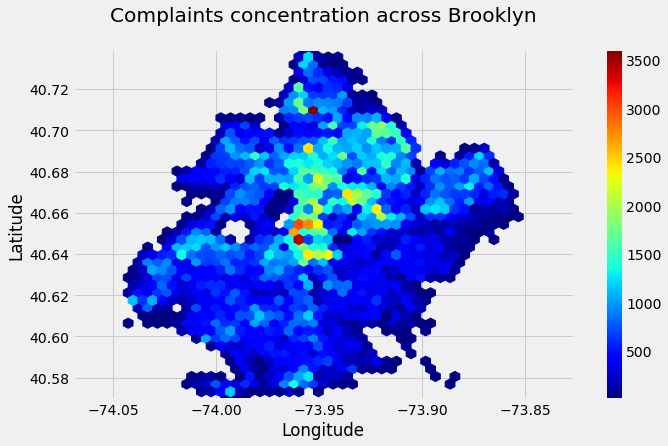

In [16]:
df_Brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')

### Working with the most frequent complaint i.e. Heat/Hot Water

In [17]:
df_perfect[df_perfect['Complaint Type'] == 'HEAT/HOT WATER']['Descriptor'].value_counts()

ENTIRE BUILDING    146366
APARTMENT ONLY      78213
Name: Descriptor, dtype: int64

In [18]:
df_Brook_Heat = df_Brooklyn[df_Brooklyn['Complaint Type'] == 'HEAT/HOT WATER']

(-74.040670973162179,
 -73.855786803255711,
 40.572605163983042,
 40.737091381226094)

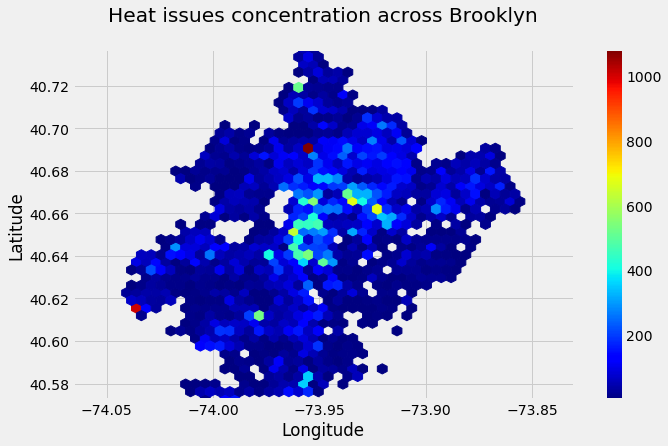

In [19]:
df_Brook_Heat[df_Brook_Heat['Complaint Type'] == 'HEAT/HOT WATER'].plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=40,title = 'Heat issues concentration across Brooklyn\n',
    colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

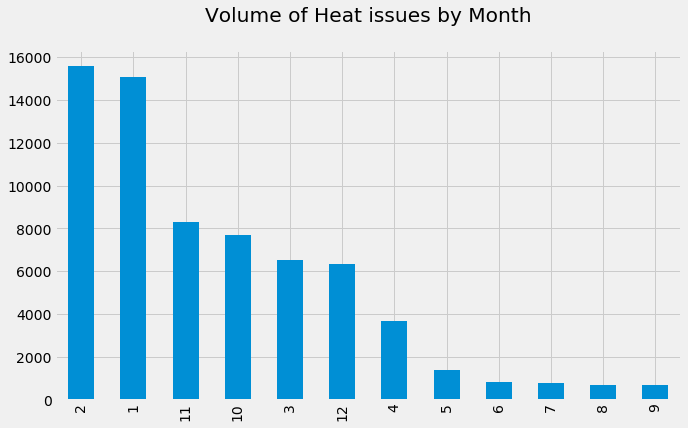

In [20]:
df_Brook_Heat['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Heat issues by Month\n')

Heat issues are most common in the months of Feb and Jan.

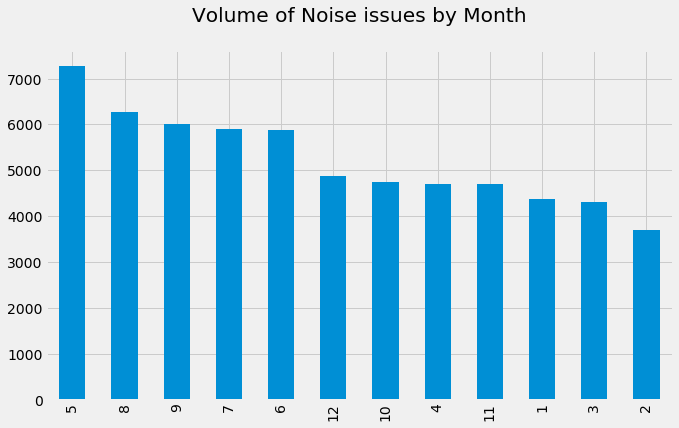

In [21]:
df_Brook_Noise = df_Brooklyn[df_Brooklyn['Complaint Type'] == 'Noise - Residential']
df_Brook_Noise['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Noise issues by Month\n')


Noise Issues are most common in the summers.

### Let's predict the resolution time for Heat issues in Brooklyn given the 2015 data

In [22]:
def getDfSummary(input_data):
    number_nan = input_data.isnull().sum()
    number_distinct = input_data.nunique(dropna=True)
    output_data = pd.DataFrame({'number_nan':number_nan,'number_distinct':number_distinct})
    return output_data

In [23]:
getDfSummary(df_Brook_Heat)

,number_distinct,number_nan
Created Date,24836,0
Closed Date,7866,0
Agency,1,0
Agency Name,2,0
Complaint Type,1,0
Descriptor,2,0
Location Type,1,0
Incident Zip,76,2
Incident Address,13104,0
Street Name,1178,0


A function to extract the features for the model. The features chosen from the dataset are based on intuition. The descriptor variable is broken into dummy variables so that it can be converted into categorical data. Similarly Incident Zip column is manipulated for bringing down the scale of column.

In [24]:
def buildFeatures(dataset):
    df_features = dataset.filter(['Descriptor','Incident Zip','Resolution_Time','Day of Week','Day of Month','Month'],axis = 1)
    data = pd.DataFrame({'descriptor': df_features.Descriptor})
    dummies=pd.get_dummies(data)
    df_model=pd.concat([df_features,dummies],axis=1)
    df_model = df_model.drop('Descriptor',1)
    df_model = df_model.dropna()
    df_model['Incident Zip'] = df_model['Incident Zip'].astype(int)
    df_model['Resolution_Time']=df_model['Resolution_Time'].astype(int)
    df_model['Incident Zip']=df_model['Incident Zip']-df_model['Incident Zip'].min()
    return df_model


In [25]:
df_model = buildFeatures(df_Brook_Heat)
df_model = df_model[['Incident Zip','Day of Week','Day of Month','Month','descriptor_APARTMENT ONLY',
                     'descriptor_ENTIRE BUILDING','Resolution_Time']]
df_model.describe()

,Incident Zip,Day of Week,Day of Month,Month,descriptor_APARTMENT ONLY,descriptor_ENTIRE BUILDING,Resolution_Time
count,67495.000000,67495.000000,67495.000000,67495.000000,67495.000000,67495.000000,67495.000000
mean,18.525061,2.943240,15.703785,5.233588,0.394889,0.605111,3.396444
std,10.624182,2.034795,8.516172,4.267747,0.488830,0.488830,2.269707
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,8.000000,2.000000,0.000000,0.000000,2.000000
50%,19.000000,3.000000,16.000000,3.000000,0.000000,1.000000,3.000000
75%,25.000000,5.000000,23.000000,10.000000,1.000000,1.000000,5.000000
max,48.000000,6.000000,31.000000,12.000000,1.000000,1.000000,43.000000


## Train Test Split

In [26]:
def splitter(dataset,y):
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3)
    return X_train,X_test,y_train,y_test

In [27]:
df_model.describe()

,Incident Zip,Day of Week,Day of Month,Month,descriptor_APARTMENT ONLY,descriptor_ENTIRE BUILDING,Resolution_Time
count,67495.000000,67495.000000,67495.000000,67495.000000,67495.000000,67495.000000,67495.000000
mean,18.525061,2.943240,15.703785,5.233588,0.394889,0.605111,3.396444
std,10.624182,2.034795,8.516172,4.267747,0.488830,0.488830,2.269707
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,8.000000,2.000000,0.000000,0.000000,2.000000
50%,19.000000,3.000000,16.000000,3.000000,0.000000,1.000000,3.000000
75%,25.000000,5.000000,23.000000,10.000000,1.000000,1.000000,5.000000
max,48.000000,6.000000,31.000000,12.000000,1.000000,1.000000,43.000000


Our target variable has values ranging from 0 to 43. This can be a reason for the classifiers to perform poorly. 

We can try dividing our target variable Resolution_Time into ranges. We can see from above that, Resolution_Time's min value is 0, max value is 43 and mean is at 3.39.

So we can divide it into following ranges:
[0,2],(2,6],(6,31],(31,43]

### Binning the target variable

In [28]:
# Since the data is highly imbalanced we are removing few outliers.
df_model.drop(df_model[df_model.Resolution_Time > 28].index, inplace=True)
df_model.Resolution_Time.value_counts()

3     12951
2     12231
4     10461
1      9932
5      7929
6      4881
0      3688
7      2538
8      1320
9       683
10      388
11      195
12       88
13       42
14       42
15       25
16       14
18       13
20       13
17       12
19       11
22        6
21        4
23        4
28        4
25        3
26        3
27        2
24        2
Name: Resolution_Time, dtype: int64

In [29]:
bins = [0,2,6,28]
group_names = [0,1,2]
df_model['categories'] = pd.cut(df_model['Resolution_Time'], bins,include_lowest=True,labels=group_names)
df_model.describe()

,Incident Zip,Day of Week,Day of Month,Month,descriptor_APARTMENT ONLY,descriptor_ENTIRE BUILDING,Resolution_Time
count,67485.000000,67485.000000,67485.000000,67485.000000,67485.000000,67485.000000,67485.000000
mean,18.525287,2.943128,15.703297,5.233444,0.394873,0.605127,3.391731
std,10.624588,2.034779,8.516091,4.267989,0.488827,0.488827,2.236168
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,8.000000,2.000000,0.000000,0.000000,2.000000
50%,19.000000,3.000000,16.000000,3.000000,0.000000,1.000000,3.000000
75%,25.000000,5.000000,23.000000,10.000000,1.000000,1.000000,5.000000
max,48.000000,6.000000,31.000000,12.000000,1.000000,1.000000,28.000000


In [30]:
getDfSummary(df_model)

,number_distinct,number_nan
Incident Zip,38,0
Day of Week,7,0
Day of Month,31,0
Month,12,0
descriptor_APARTMENT ONLY,2,0
descriptor_ENTIRE BUILDING,2,0
Resolution_Time,29,0
categories,3,0


Let's train our model with categories as target variable.

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = splitter(df_model,df_model['categories'])
X1 = X_train.drop(['Resolution_Time','categories'],1)
Y1 = y_train
X2 = X_test.drop(['Resolution_Time','categories'],1)
Y2 = y_test
log=LogisticRegression(C=1e30)
log.fit(X1,Y1)
accuracy_score(Y2,log.predict(X2))

0.57808949916032792

In [32]:
print(log.predict(X2))

[0 1 1 ..., 1 1 1]


### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import scipy as sp
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X1,Y1)
y1_model = clf.score(X1,Y1)
y2_model = clf.score(X2,Y2)
print("Accuracy on training dataset = ",y1_model*100,"%","\nAccuracy on test dataset = ",y2_model*100,"%")


Accuracy on training dataset =  75.5667986198 % 
Accuracy on test dataset =  62.1456090092 %


### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1, Y1)

predicted = rf.predict(X2)
accuracy = accuracy_score(Y2, predicted)
accuracy

0.62486417070038525

Random forest Classifier and Decision tree classifier both are giving an accuracy of about 62%. To evaluate our model let's see how the confusion matrix looks like for them.

## Evaluation Metric

Code to create confusion matrix.

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### For Random Forest Classifier

In [36]:
from sklearn.metrics import confusion_matrix
Y2_pred = rf.predict(X2)
cnf_matrix=confusion_matrix(Y2, Y2_pred)

Normalized confusion matrix
[[ 0.55115806  0.41639094  0.03245101]
 [ 0.22262401  0.73546592  0.04191006]
 [ 0.22333125  0.53462258  0.24204616]]


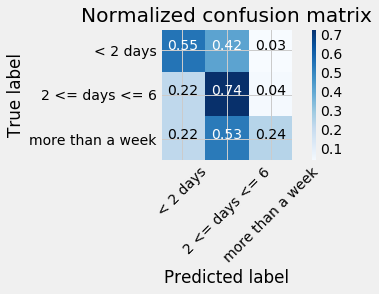

In [37]:
import itertools
class_names = ['< 2 days','2 <= days <= 6','more than a week',]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

### For Decision Tree Classifier

In [38]:
from sklearn.metrics import confusion_matrix
Y2_pred = clf.predict(X2)
cnf_matrix=confusion_matrix(Y2, Y2_pred)

Normalized confusion matrix
[[ 0.60244337  0.37223212  0.02532451]
 [ 0.2676866   0.69568846  0.03662494]
 [ 0.26699938  0.51777916  0.21522146]]


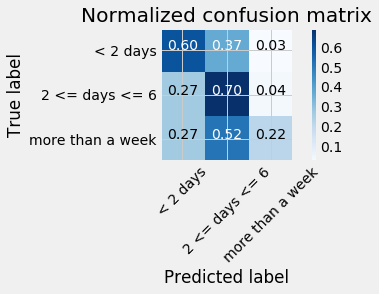

In [39]:
import itertools
class_names = ['< 2 days','2 <= days <= 6','more than a week',]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

So we can see from the above confusion matrices that our models are doing fairly good for the first two classes of output. But because of lack of data points for the third class, it's giving the wrong output for third class.

We can check if the accuracy improves if we scale our dataset and then do modelling.

### Scaling using sklearn Preprocessing

In [40]:
from sklearn import preprocessing
scaled = preprocessing.scale(df_model[['Incident Zip', 'Day of Week',
       'Day of Month', 'Month']])
data_clean = pd.DataFrame(scaled,index=df_model.index,columns= ['Incident Zip','Day of Week',
       'Day of Month', 'Month'] )
data_clean = pd.concat([data_clean, df_model.iloc[:,4:6],df_model['categories']], axis=1)

In [41]:
data_clean.describe()

,Incident Zip,Day of Week,Day of Month,Month,descriptor_APARTMENT ONLY,descriptor_ENTIRE BUILDING
count,6.748500e+04,6.748500e+04,6.748500e+04,6.748500e+04,67485.000000,67485.000000
mean,-3.631878e-16,-6.989527e-16,-3.564407e-15,-3.699186e-14,0.394873,0.605127
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.488827,0.488827
min,-1.743637e+00,-1.446422e+00,-1.726544e+00,-9.919135e-01,0.000000,0.000000
25%,-8.024170e-01,-9.549649e-01,-9.045646e-01,-7.576094e-01,0.000000,0.000000
50%,4.468092e-02,2.795012e-02,3.484054e-02,-5.233052e-01,0.000000,1.000000
75%,6.094129e-01,1.010865e+00,8.568200e-01,1.116824e+00,1.000000,1.000000
max,2.774219e+00,1.502323e+00,1.796225e+00,1.585432e+00,1.000000,1.000000


### Logistic Regression on Scaled

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = splitter(data_clean,data_clean.categories)
X1 = X_train.drop('categories',1)
Y1 = y_train
X2 = X_test.drop('categories',1)
Y2 = y_test
log=LogisticRegression(C=1e30)
log.fit(X1,Y1)
accuracy_score(Y2,log.predict(X2))

0.57408870888076657

### Decision Tree Classifier on Scaled

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import scipy as sp
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X1,Y1)
y1_model = clf.score(X1,Y1)
y2_model = clf.score(X2,Y2)
print("Accuracy on training dataset = ",y1_model*100,"%","\nAccuracy on test dataset = ",y2_model*100,"%")

Accuracy on training dataset =  75.8673977011 % 
Accuracy on test dataset =  61.1478810629 %


### Random Forest Classifier on Scaled

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1, Y1)

predicted = rf.predict(X2)
accuracy = accuracy_score(Y2, predicted)
accuracy

0.61859132668181371

Even after scaling our dataset, we do not see any improvement in the accuracy of model.

## Time Series Analysis on all 5 boroughs
### Trying to predict the volume of calls on a given day

Let's create a new dataframe to perform time series analysis.

In [45]:
time = df_perfect['Created Date'].value_counts()
print(time.size)
#Considering days where atleast 25 calls were made in a day
time = time[time > 25]
print(time.size)

1403536
391


## Using traditional ARMA modelling

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.api import qqplot
import statsmodels.tsa.api as tsa
import statsmodels.api as sm
from scipy import stats

In [47]:
volume = pd.DataFrame({'ds':time.index, 'y':time.values})
volume.set_index(['ds'], inplace=True)
volume.y = volume.y.astype('float64')

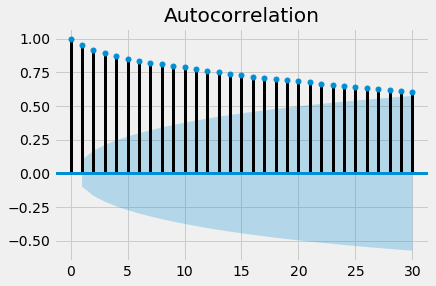

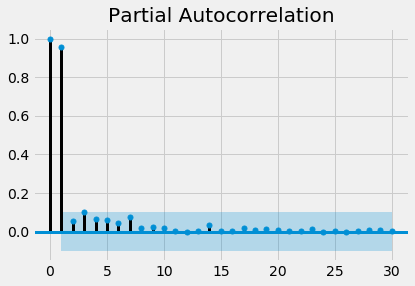

In [48]:
plot_acf(volume.y,lags=30)
plt.show()

plot_pacf(volume.y,lags=30)
plt.show()

We can see that ACF plot decreases exponentially and PACF plot has just the spike on lag 1. Hence, this is a ARMA(1,0) model.

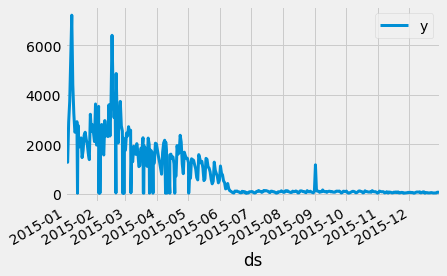

In [49]:
volume.plot()

This is how our time series looks like.

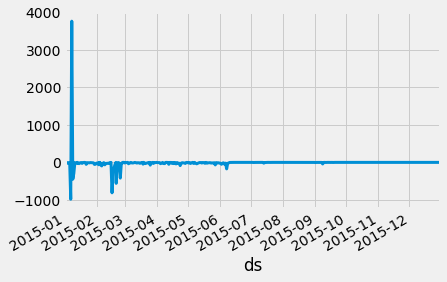

In [50]:
model = tsa.ARMA(volume.y, (1, 0)).fit()
model.resid.plot()

This is how it looks after removing the seasonality.

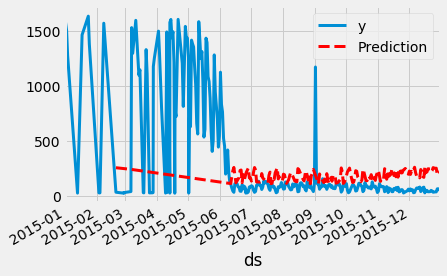

In [51]:
forecast = model.predict('2015-09-04','2015-12-06',dynamic = True)
plot = volume.ix['2015':].plot()
plot = forecast.plot(ax=plot, style='r--', label='Prediction')
plot.legend()

In [52]:
forecast

ds
2015-09-04 00:00:00    110.903791
2015-08-27 00:00:00    111.807338
2015-07-20 00:00:00    112.710641
2015-06-11 00:00:00    113.613700
2015-09-28 00:00:00    114.516515
2015-08-04 00:00:00    115.419087
2015-07-21 00:00:00    116.321414
2015-09-21 00:00:00    117.223498
2015-07-17 00:00:00    118.125338
2015-09-15 00:00:00    119.026935
2015-09-14 00:00:00    119.928288
2015-06-16 00:00:00    120.829398
2015-06-22 00:00:00    121.730265
2015-09-09 00:00:00    122.630888
2015-10-07 00:00:00    123.531268
2015-09-29 00:00:00    124.431404
2015-09-23 00:00:00    125.331298
2015-10-08 00:00:00    126.230949
2015-07-09 00:00:00    127.130356
2015-07-06 00:00:00    128.029521
2015-07-07 00:00:00    128.928443
2015-08-14 00:00:00    129.827122
2015-10-15 00:00:00    130.725558
2015-07-10 00:00:00    131.623752
2015-09-11 00:00:00    132.521703
2015-11-03 00:00:00    133.419412
2015-10-27 00:00:00    134.316878
2015-09-17 00:00:00    135.214102
2015-07-01 00:00:00    136.111084
2015-08-12 

In [53]:
dw = sm.stats.durbin_watson(volume.y)
print(dw)

0.00347188108193


In [54]:
MFE = volume.y.sub(forecast).mean()
MAE = np.mean((np.abs(MFE/forecast)))
print("MFE = ",MFE,"\nMAE = ",MAE)

MFE =  -117.46489790455281 
MAE =  0.6667867415358774


Durbin Watson test is showing the presence of positive auto correlation. 
The MFE value suggests that over our model is over forecasting. And this can be seen in the graph above as well.
And the low value of MAE suggests that even though our model is over forecasting, it is a pretty good fit.

## Using Prophet Model

In [55]:
time = df_perfect['Created Date'].value_counts()
print(time.size)
#Considering days where atleast 25 calls were made in a day
time = time[time > 25]
print(time.size)

1403536
391


In [56]:
volume = pd.DataFrame({'ds':time.index, 'y':time.values})
volume['y_orig'] = volume['y'] # to save a copy of the original data.. 
# log-transform y
volume['y'] = np.log(volume['y'])
volume.shape

(391, 3)

To remove outliers or any other anomalies we are using the log-transform.

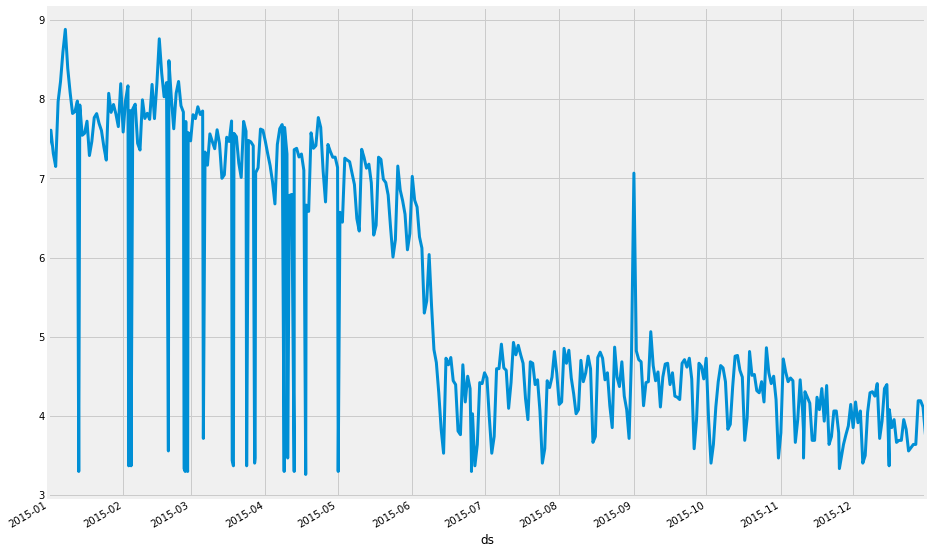

In [57]:
%matplotlib inline
 
plt.rcParams['figure.figsize']=(14,10)
volume.set_index('ds').y.plot()

This is how our time series looks like on log scale.

In [58]:
from fbprophet import Prophet 
m = Prophet(yearly_seasonality=True)
m.fit(volume)
future = m.make_future_dataframe(periods=60)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
446,2016-02-25,4.216273,3.750287,4.690173
447,2016-02-26,4.071014,3.576535,4.534200
448,2016-02-27,3.645049,3.214166,4.060201
449,2016-02-28,3.574651,3.123150,4.036060
450,2016-02-29,4.133557,3.650807,4.598922


In the forecast dataframe, yhat is the forecast value, yhat_lower and yhat_upper are the uncertainty levels.

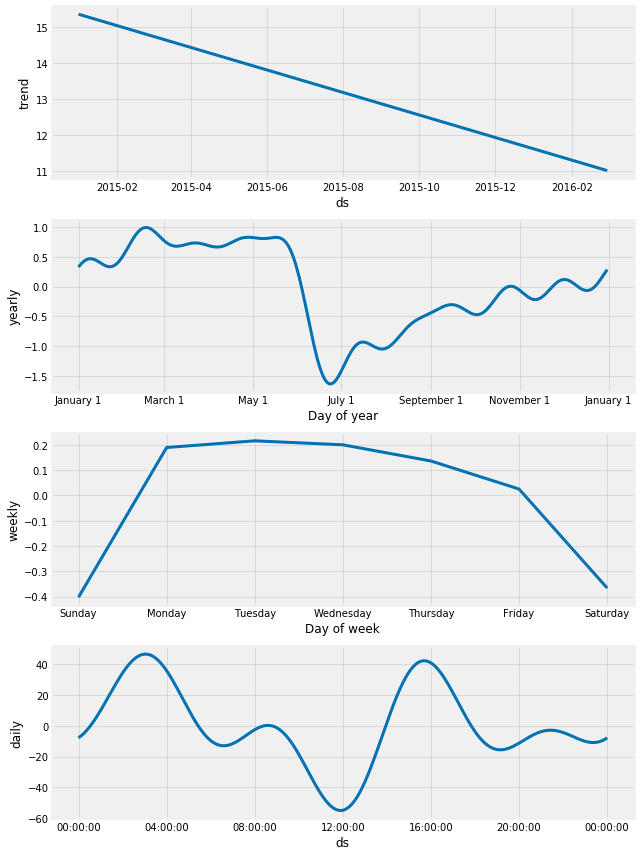

In [59]:
x = m.plot_components(forecast)

The above plots are showing the trend of data, yearly, weekly and daily seasonality of the data.

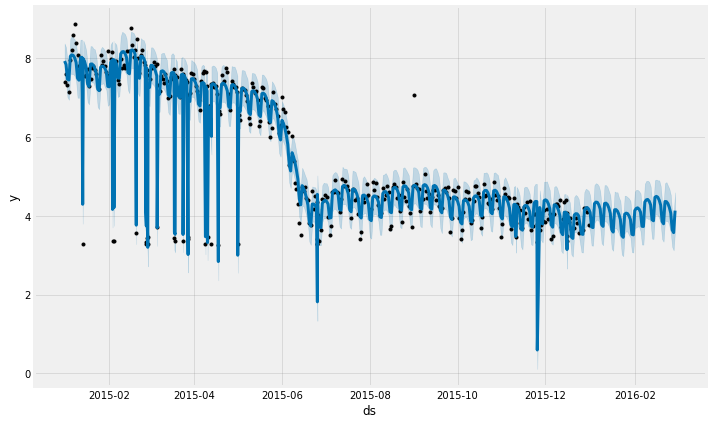

In [60]:
x = m.plot(forecast)

This plot is drawing the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area). The plot is showing the forecasted values for entire data as well as the new data for Jan and Feb month of 2016. The shaded area in graph is the uncertaintity estimation of forecast.

Merging the orignal dataframe and the forecast dataframe on ds column to perform goodness of fit test.

0.953887894029


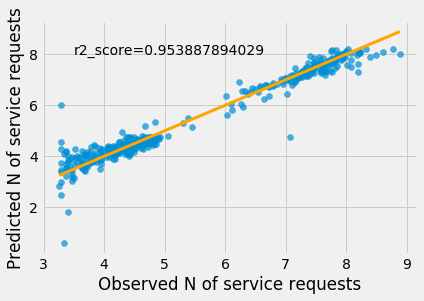

In [63]:
joined_df = volume.merge(forecast, left_on='ds', right_on='ds')
from sklearn.metrics import mean_squared_error, r2_score
plt.scatter(joined_df.y, joined_df.yhat, alpha = 0.7)
r2_score(joined_df.y, joined_df.yhat)
print(r2_score(joined_df.y, joined_df.yhat))
plt.xlabel('Observed N of service requests')
plt.ylabel('Predicted N of service requests')
plt.text(3.5,8,"r2_score="+str(r2_score(joined_df.y, joined_df.yhat)))
plt.plot([joined_df.y.min(),joined_df.y.max()],[joined_df.y.min(),joined_df.y.max()], color='orange')

We can see here, that we are getting high value for R2 test. This means that our model is a good fit.

## Working with storms dataset

In [64]:
df_storm = pd.read_csv('/Users/ayush007/Documents/FDS/NYC 311/storm_data_search_results.csv', header=0,
    sep=',', parse_dates=['BEGIN_DATE'],index_col='EVENT_ID')

In [65]:
df_storm.head()

,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,...,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,ABSOLUTE_ROWNUMBER
EVENT_ID,,,,,,,,,,,,,,,,,,,,,
211892,KINGS (BROOKLYN) (ZONE),,2010-01-03,800,Strong Wind,41.00,,0,0,5000,...,,,,,,,,,,1
211893,BRONX (ZONE),,2010-01-25,600,Strong Wind,48.00,,0,1,1000,...,,,,,,,,,,2
214130,NEW YORK (MANHATTAN) (ZONE),,2010-01-25,600,Strong Wind,48.00,,0,0,25000,...,,,,,,,,,,3
217497,RICHMOND (STATEN IS.) (ZONE),,2010-02-09,2100,Heavy Snow,,,0,0,0,...,,,,,,,,,,4
217496,KINGS (BROOKLYN) (ZONE),,2010-02-09,2200,Heavy Snow,,,0,0,0,...,,,,,,,,,,5


In [66]:
df_storm.CZ_NAME_STR.unique()

array(['KINGS (BROOKLYN) (ZONE)', 'BRONX (ZONE)',
       'NEW YORK (MANHATTAN) (ZONE)', 'RICHMOND (STATEN IS.) (ZONE)',
       'NEW YORK CO.', 'QUEENS CO.', 'BRONX CO.', 'KINGS CO.',
       'RICHMOND CO.', 'SOUTHERN QUEENS (ZONE)', 'NORTHERN QUEENS (ZONE)'], dtype=object)

Let's make the Borough names consistent throughout the notebook.

In [67]:
Boroughs = {}
Boroughs['KINGS (BROOKLYN) (ZONE)'] = 'BROOKLYN'
Boroughs['KINGS CO.'] = 'BROOKLYN'
Boroughs['BRONX (ZONE)'] = 'BRONX'
Boroughs['BRONX CO.'] = 'BRONX'
Boroughs['NEW YORK (MANHATTAN) (ZONE)'] = 'MANHATTAN'
Boroughs['NEW YORK CO.'] = 'MANHATTAN'
Boroughs['SOUTHERN QUEENS (ZONE)'] = 'QUEENS'
Boroughs['NORTHERN QUEENS (ZONE)'] = 'QUEENS'
Boroughs['QUEENS CO.'] = 'QUEENS'
Boroughs['RICHMOND (STATEN IS.) (ZONE)'] = 'STATEN ISLAND'
Boroughs['RICHMOND CO.'] = 'STATEN ISLAND'
df_storm.replace({"CZ_NAME_STR": Boroughs},inplace=True)

In [68]:
df_perfect.Borough.unique()

array(['QUEENS', 'MANHATTAN', 'BRONX', 'BROOKLYN', 'STATEN ISLAND'], dtype=object)

In [69]:
df_storm.CZ_NAME_STR.unique()

array(['BROOKLYN', 'BRONX', 'MANHATTAN', 'STATEN ISLAND', 'QUEENS'], dtype=object)

In [70]:
df_storm.columns

Index(['CZ_NAME_STR', 'BEGIN_LOCATION', 'BEGIN_DATE', 'BEGIN_TIME',
       'EVENT_TYPE', 'MAGNITUDE', 'TOR_F_SCALE', 'DEATHS_DIRECT',
       'INJURIES_DIRECT', 'DAMAGE_PROPERTY_NUM', 'DAMAGE_CROPS_NUM',
       'STATE_ABBR', 'CZ_TIMEZONE', 'MAGNITUDE_TYPE', 'EPISODE_ID', 'CZ_TYPE',
       'CZ_FIPS', 'WFO', 'INJURIES_INDIRECT', 'DEATHS_INDIRECT', 'SOURCE',
       'FLOOD_CAUSE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION',
       'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'ABSOLUTE_ROWNUMBER'],
      dtype='object')

In [71]:
df_storm = df_storm.rename(columns={'BEGIN_DATE': 'Created Date', 'CZ_NAME_STR': 'Storm_Borough'})

performing inner join of storms dataframe and data of all 5 boroughs on Created Date column.

In [72]:
result = pd.merge(df_perfect,df_storm[['Storm_Borough','Created Date','BEGIN_TIME','EVENT_TYPE']],on='Created Date')

In [73]:
result.head(3)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Longitude,Location,Resolution_Time,Day of Week,Day of Month,Month,Year,Storm_Borough,BEGIN_TIME,EVENT_TYPE
0,2015-06-23,2015-06-30,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,10467,663 ADEE AVENUE,ADEE AVENUE,...,-73.868687,"(40.86968884044925, -73.86868659164115)",7.0,1,23,6,2015,QUEENS,1720,Thunderstorm Wind
1,2015-06-23,2015-06-30,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,10467,663 ADEE AVENUE,ADEE AVENUE,...,-73.868687,"(40.86968884044925, -73.86868659164115)",7.0,1,23,6,2015,QUEENS,1722,Thunderstorm Wind
2,2015-06-23,2015-06-24,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10463,3900 BAILEY AVENUE,BAILEY AVENUE,...,-73.895400,"(40.885300511706376, -73.89539982732745)",1.0,1,23,6,2015,QUEENS,1720,Thunderstorm Wind


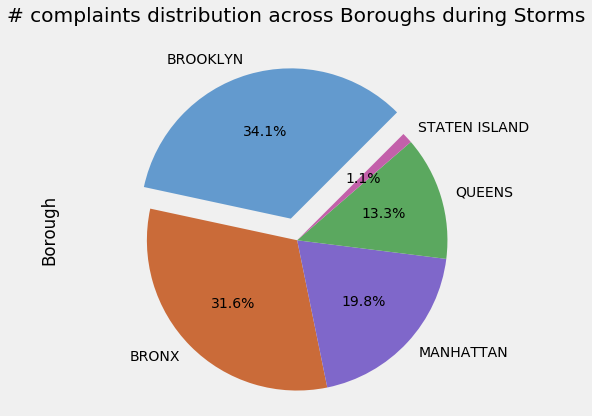

In [74]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
result['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('# complaints distribution across Boroughs during Storms\n')
plt.tight_layout()
plt.show()

Even during the storms, most number of complaints come from Brooklyn.

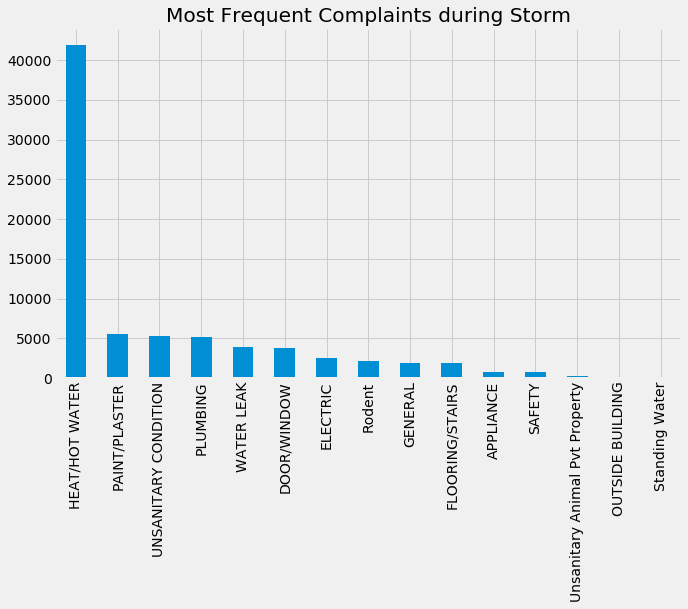

In [75]:
(result['Complaint Type'].value_counts()).head(15).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints during Storm')

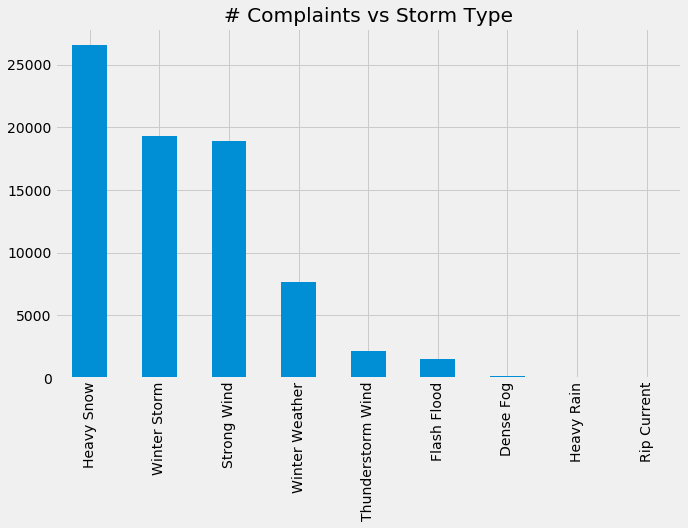

In [76]:
(result['EVENT_TYPE'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = '# Complaints vs Storm Type')

Plotting the comparison graph of response time between normal days and storm days.

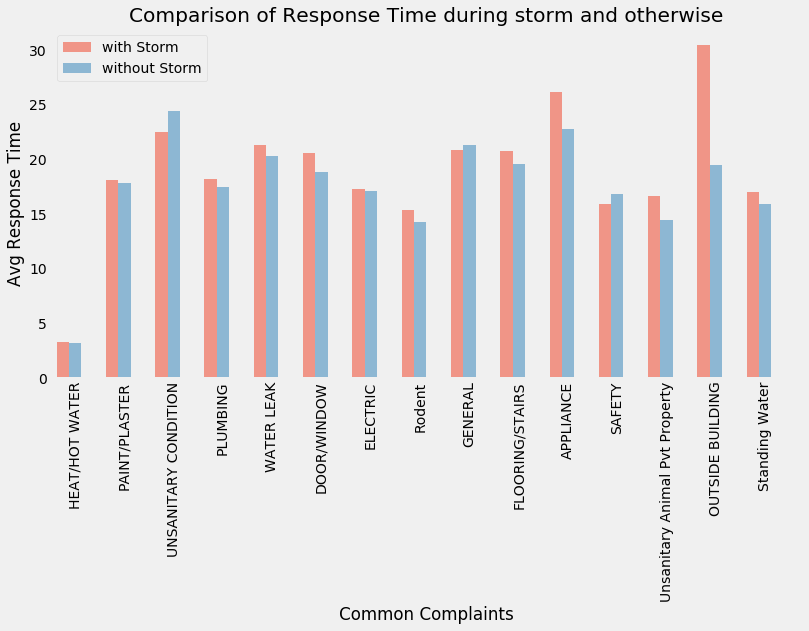

In [77]:
storm = (result['Complaint Type'].value_counts()).head(15)
noStorm = df_perfect[df_perfect['Complaint Type'].isin(storm.index)]

var = result.groupby('Complaint Type').Resolution_Time.mean()
frequent = result['Complaint Type'].value_counts().head(15)
var = var.ix[frequent.index]

var1 = noStorm.groupby('Complaint Type').Resolution_Time.mean()
frequent1 = noStorm['Complaint Type'].value_counts().head(15)
var1 = var1.ix[frequent.index]

# Setting the positions and width for the bars
pos = list(range(len(var))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(12,6))

# in position pos,
plt.bar(pos, 
        var, 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#f03b20', 
        label=var.index[0]) 


# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        var1,
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#2c7fb8', 
        label=var.index[1]) 


# Set the x,y axis label
ax.set_ylabel('Avg Response Time')
ax.set_xlabel('Common Complaints')


# Set the chart's title
ax.set_title('Comparison of Response Time during storm and otherwise')

# Set the position of the x ticks
ax.set_xticks([p + width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(var1.index)
#ax.grid(axis=1)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)

plt.xticks(rotation='vertical')
# Adding the legend and showing the plot
plt.legend(['with Storm', 'without Storm'], loc='upper left')
plt.grid()
#plt.show()

### Time Series Analysis for seeing how volume of calls changes during a storm.

In [78]:
time = result['Created Date'].value_counts()

In [79]:
vol = pd.DataFrame({'ds':time.index, 'y':time.values})
vol['y_orig'] = vol['y'] # to save a copy of the original data..
# log-transform y
vol['y'] = np.log(vol['y'])

In [80]:
from fbprophet import Prophet 
m = Prophet(daily_seasonality=True)
m.fit(vol)

future = m.make_future_dataframe(periods=0)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


,ds,yhat,yhat_lower,yhat_upper
15,2015-08-15,4.882791,4.124614,5.679256
16,2015-08-21,4.744045,3.930135,5.481617
17,2015-12-23,3.527131,2.728928,4.352709
18,2015-12-24,3.700456,2.965805,4.443051
19,2015-12-27,3.332287,2.488846,4.130910


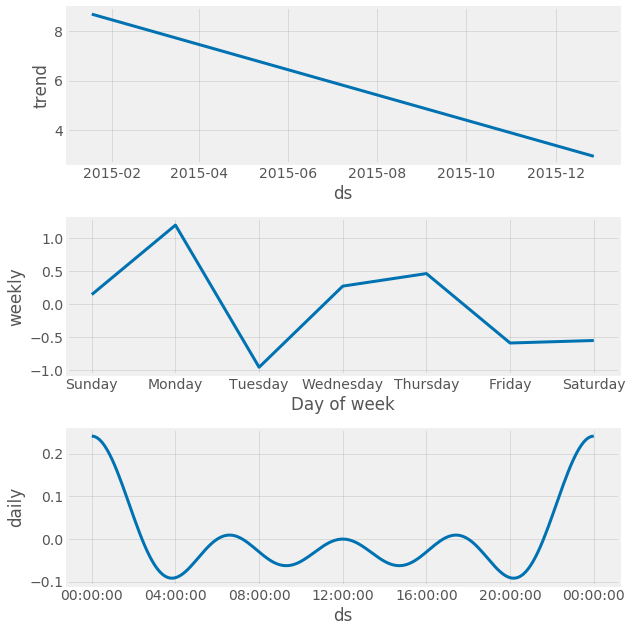

In [482]:
x = m.plot_components(forecast)

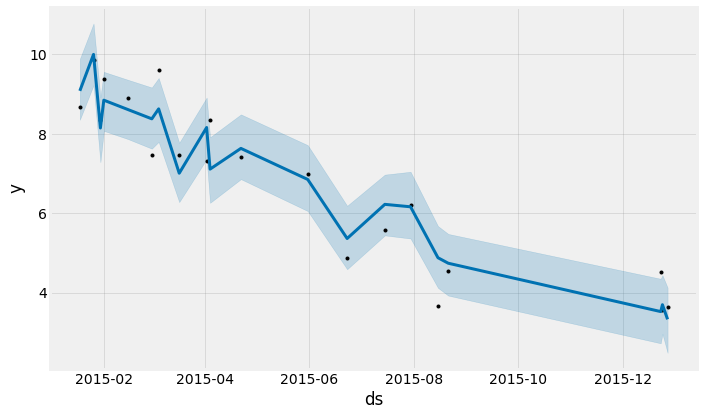

In [81]:
x = m.plot(forecast)

In [82]:
joined_df = vol.merge(forecast, left_on='ds', right_on='ds')
# merging the original dataset and forecast dataframe to perform the goodness of fit test.

0.903472509313


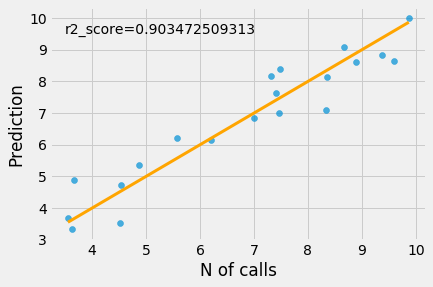

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
plt.scatter(joined_df.y, joined_df.yhat, alpha = 0.7)
print(r2_score(joined_df.y, joined_df.yhat))
plt.xlabel('N of calls')
plt.ylabel('Prediction')
plt.text(3.5,9.5,"r2_score="+str(r2_score(joined_df.y, joined_df.yhat)))
plt.plot([joined_df.y.min(),joined_df.y.max()],[joined_df.y.min(),joined_df.y.max()], color='orange')